**AUTHOR : ANAND VEERARAHAVAN**


**SPACY**

spaCy is a free open-source library for Natural Language Processing in Python.

In [1]:
import spacy
import random
from collections import Counter #for counting
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
sns.set(font_scale=2)
import json
def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [2]:
!python -m spacy download en_core_web_lg # three variants : sm, md, lg
import en_core_web_lg

nlp = en_core_web_lg.load()
# python -m spacy download en_vectors_

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=2c325a5de5f8190fcf1b1aba3150735204095ef164c74fe835a1d120c1325676
  Stored in directory: /tmp/pip-ephem-wheel-cache-_cmp6phs/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving all_djt_tweets.csv to all_djt_tweets.csv
User uploaded file "all_djt_tweets.csv" with length 7253458 bytes


In [4]:
tweets = pd.read_csv("all_djt_tweets.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(tweets)

       Unnamed: 0              source  ... is_retweet        id_str
0               0  Twitter for iPhone  ...      False  1.033877e+18
1               1  Twitter for iPhone  ...      False  1.033837e+18
2               2  Twitter for iPhone  ...      False  1.033724e+18
3               3  Twitter for iPhone  ...      False  1.033723e+18
4               4  Twitter for iPhone  ...       True  1.033722e+18
...           ...                 ...  ...        ...           ...
328048      34835  Twitter Web Client  ...      False  1.773561e+09
328049      34836  Twitter Web Client  ...      False  1.741161e+09
328050      34837  Twitter Web Client  ...      False  1.737480e+09
328051      34838  Twitter Web Client  ...      False  1.701461e+09
328052      34839  Twitter Web Client  ...      False  1.698309e+09

[328053 rows x 8 columns]


### Named Entity Recognition aka NER


spaCy can recognise various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn't always work perfectly and might need some tuning later, depending on your use case.

In [6]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [7]:
explain_text_entities(tweets['text'][9])

Entity: Friday, Label: DATE, Absolute or relative dates or periods
Entity: U.S.A., Label: GPE, Countries, cities, states


In [8]:
tweets['text'][9]

'Stock Market hit all time high on Friday. Congratulations U.S.A.!'

In [9]:
one_sentence = tweets['text'][0]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [10]:
one_sentence = tweets['text'][200]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [11]:
one_sentence = tweets['text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

One simple use case for NER is to automatically redact names. This is important and quite useful.

In [12]:
def redact_names(text):
    doc = nlp(text)
    redacted_sentence = []
    for ent in doc.ents:
        ent.merge()
    for token in doc:
        if token.ent_type_ == "PERSON":
            redacted_sentence.append("[REDACTED]")
        else:
            redacted_sentence.append(token.string)
    return "".join(redacted_sentence)

In [13]:
printmd("**Before**", color="blue")
one_sentence = tweets['text'][450]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)
printmd("**After**", color="blue")
one_sentence = redact_names(tweets['text'][450])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

printmd("Notice that `Obama W.H.` was removed", color="#6290c8")

<span style='color:blue'>**Before**</span>

<span style='color:blue'>**After**</span>

<span style='color:#6290c8'>Notice that `Obama W.H.` was removed</span>

### Part-of-Speech Tagging


Sometimes, we want to quickly pull out keywords, or keyphrases from a larger body of text. This helps us mentally paint a picture of what this text is about. This is particularly helpful in analysis of texts like long emails or essays.

As a quick hack, we can pull out all relevant "nouns". This is because most keywords are in fact nouns of some form.

Noun Chunks
We need noun chunks. Noun chunks are noun phrases - not a single word, but a short phrase which describes the noun. For example, "the blue skies" or "the world’s largest conglomerate".

In [14]:
tweets['text'][9]

'Stock Market hit all time high on Friday. Congratulations U.S.A.!'

In [15]:
example_text = tweets['text'][9]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'Stock Market'
sentence 1 has noun chunk 'Friday'
sentence 2 has noun chunk 'Congratulations'


In [16]:
one_sentence = tweets['text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

for token in doc:
    print(token, token.pos_)

Incredibly ADV
beautiful ADJ
ceremony NOUN
as SCONJ
U.S. PROPN
Korean PROPN
War PROPN
remains NOUN
are AUX
returned VERB
to ADP
American ADJ
soil NOUN
. PUNCT
Thank VERB
you PRON
to ADP
Honolulu PROPN
and CCONJ
all DET
of ADP
our DET
great ADJ
Military ADJ
participants NOUN
on ADP
a DET
job NOUN
well ADV
done VERB
. PUNCT
A DET
special ADJ
thanks NOUN
to ADP
Vice PROPN
President PROPN
Mike PROPN
Pence PROPN
on ADP
delivering VERB
a DET
truly ADV
magnificent ADJ
tribute NOUN
! PUNCT


### What does Trump talk about?


It might be interesting to explore what does Trump even talk about? Is it always them 'Angry Dems'? Or is he a narcissist with too many mentions of The President and the USA?

One way to explore this would be to mine out all the entities and noun chunks from all his tweets! Let's go ahead and do that with amazing ease using spaCy

In [17]:
text = tweets['text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [18]:
doc = nlp(text)

In [19]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

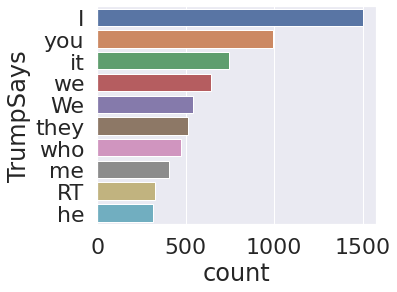

In [20]:
df_nouns = pd.DataFrame(items_of_interest, columns=["TrumpSays"])
plt.figure(figsize=(5,4))
sns.countplot(y="TrumpSays",
             data=df_nouns,
             order=df_nouns["TrumpSays"].value_counts().iloc[:10].index)
plt.show()

In [21]:
trump_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        trump_topics.append(token)
        
trump_topics = [str(x) for x in trump_topics]

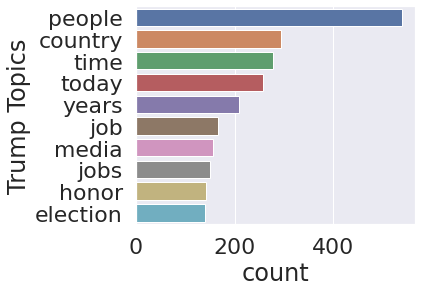

In [22]:
df_nouns = pd.DataFrame(trump_topics, columns=["Trump Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Topics",
             data=df_nouns,
             order=df_nouns["Trump Topics"].value_counts().iloc[:10].index)
plt.show()

In [23]:
trump_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        trump_topics.append(ent.text.strip())


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


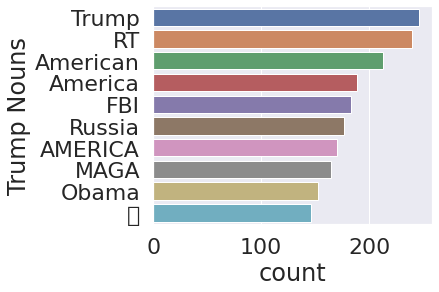

In [24]:
df_ttopics = pd.DataFrame(trump_topics, columns=["Trump Nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Nouns",
             data=df_ttopics,
             order=df_ttopics["Trump Nouns"].value_counts().iloc[1:11].index)
plt.show()

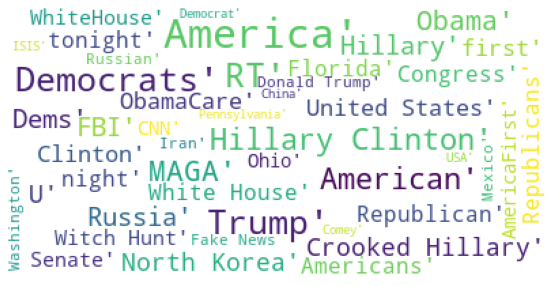

In [25]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(trump_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Using Linguistic annotations with spaCy Match

We want to find out what Trump is saying about

Himself e.g. "I am rich".
Russia
Democrats
We want to start off by finding adjectives following "Democrats are" or "Democrats were".

This is obviously a very rudimentary solution, but it'll be fast, and a great way get an idea for what's in your data. Our pattern looks like this:

In [26]:
[{'LOWER': 'Russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]

[{'LOWER': 'Russia'},
 {'LEMMA': 'be'},
 {'OP': '*', 'POS': 'ADV'},
 {'POS': 'ADJ'}]

In [27]:
from spacy.matcher import Matcher
# doc = nlp(text)
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    if doc.vocab.strings[match_id] == 'DEMOCRATS':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'DEMOCRATS'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'RUSSIA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'RUSSIA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'I':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'NARC'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    
# declare different patterns
russia_pattern = [{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
democrats_pattern = [{'LOWER': 'democrats'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
i_pattern = [{'LOWER': 'i'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]

matcher.add('DEMOCRATS', collect_sents, democrats_pattern)  # add pattern
matcher.add('RUSSIA', collect_sents, russia_pattern)  # add pattern
matcher.add('I', collect_sents, i_pattern)  # add pattern
matches = matcher(doc)

spacy.displacy.render(matched_sents, style='ent', manual=True, jupyter=True,  options = {'colors': {'NARC': '#6290c8', 'RUSSIA': '#cc2936', 'DEMOCRATS':'#f2cd5d'}})

In [28]:
pretty_print(matched_sents[:3])

[
  {
    "text": "I am sorry to have to reiterate that there are serious and unpleasant consequences to crossing the Border into the United States ILLEGALLY!",
    "ents": [
      {
        "start": 0,
        "end": 10,
        "label": "NARC"
      }
    ]
  },
  {
    "text": "It was Fusion GPS that hired Steele to write the phony ; discredited Dossier, paid for by Crooked Hillary ; the DNC I am proud to have fought for and secured the LOWEST African American and Hispanic unemployment rates in history.",
    "ents": [
      {
        "start": 116,
        "end": 126,
        "label": "NARC"
      }
    ]
  },
  {
    "text": "\u201cCollusion with Russia was very real.",
    "ents": [
      {
        "start": 16,
        "end": 36,
        "label": "RUSSIA"
      }
    ]
  }
]
